In [18]:
from typing import TypedDict, Literal

INTEREST_RATE = 1.08
ARS_USD_EXCHANGE_RATE = 1430
EUR_USD_EXCHANGE_RATE = 1.05

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal["ARS", "EUR"]
    total_target_currency: float
    

In [19]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * INTEREST_RATE
    return state

def convert_to_ars(state: PortfolioState) -> PortfolioState:
    state["total_target_currency"] = state["total_usd"] * ARS_USD_EXCHANGE_RATE
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state["total_target_currency"] = state["total_usd"] / EUR_USD_EXCHANGE_RATE
    return state

def select_conversion(state: PortfolioState) -> PortfolioState:
    return state["target_currency"]

In [28]:
from langgraph.graph import StateGraph, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total", calc_total)
builder.add_node("convert_to_ars", convert_to_ars)
builder.add_node("convert_to_eur", convert_to_eur)

builder.set_entry_point("calc_total")
builder.add_edge(["convert_to_ars", "convert_to_eur"], END)

builder.add_conditional_edges("calc_total", select_conversion, {"ARS": "convert_to_ars", "EUR": "convert_to_eur"})
graph = builder.compile()


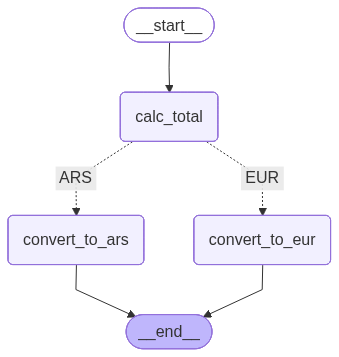

In [29]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
graph.invoke({"amount_usd": 1000, "target_currency": "ARS"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'ARS',
 'total_target_currency': 1544400.0}

In [31]:
graph.invoke({"amount_usd": 1000, "target_currency": "EUR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total_target_currency': 1028.5714285714284}